# Motion Analysis
In this example, you'll analyze the stright-line motion of an object.

To get started,
- First, click the disc icon at the top to save the notebook. That makes it easier to start over later if you need to.
- Go to the menu bar above and select **Kernel > Restart & Run All**.
- You won't hurt anything by experimenting. If you break it, go to **File > Revert to checkpoint** to start over.
- Is this your first time? Need a refresher? Try the 5-minute [Intro to Jupyter activity](./Intro_to_Jupyter.ipynb) and come back here. 

When you're ready, scroll down to **Part One**.

In [1]:
# First, we'll "import" the software packages needed.
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
inline_rc = dict(mpl.rcParams)

# Starting a line with a hashtag tells the program not to read the line.
# That way we can write "comments" to humans trying to figure out what the code does.
# Blank lines don't do anything either, but they can make the code easier to read.

In [2]:
# Whenever you type "something =" it defines a new variable, "something", 
# and sets it equal to whatever follows the equals sign. That could be a number, 
# another variable, or in this case an entire table of numbers.

# enter raw data
data = pd.DataFrame.from_items([
        ('time (s)', [0,1,2,3,4]), 
        ('position (m)', [0,2,4,6,10])
        ])
# display data table
data

,time (s),position (m)
0,0,0
1,1,2
2,2,4
3,3,6
4,4,10


## Part One
The code above has sample data for position and time.
- Where was the object at two seconds?
- Where did the object end up?
- How long did it take to go from 2 m to 6 m?

When you're ready, scroll down to **Part Two**.

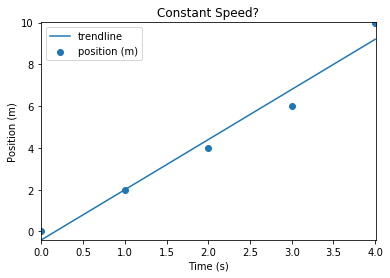

In [3]:
# set variables = data['column label']
time = data['time (s)']
pos = data['position (m)']

# this makes a scatterplot of the data
# plt.scatter(x values, y values)
plt.scatter(time, pos)
plt.title("Constant Speed?")
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.autoscale(tight=True)

# calculate a trendline equation
# np.polyfit( x values, y values, polynomial order)
trend = np.polyfit(time, pos, 1)

# plot trendline
# plt.plot(x values, y values, other parameters)
plt.plot(time, np.poly1d(trend)(time), label='trendline')
plt.legend(loc='upper left')

In [4]:
# display the trendline's coefficients (slope, y-int)
trend

array([ 2.4, -0.4])

## Part Two
The graph above shows what the data in the table looks like.
- When was the object moving at a constant speed?
- When was it moving the fastest?
- What feature of the trendline shows the average speed? Can you tell how fast that was?

When you're ready, scroll down to **Part Three**.

In [5]:
# create a new empty column
data['velocity (m/s)'] = ''
data

,time (s),position (m),velocity (m/s)
0,0,0,
1,1,2,
2,2,4,
3,3,6,
4,4,10,


In [6]:
# np.diff() calculates the difference between a value and the one after it
vel = np.diff(pos) / np.diff(time)

# fill the velocity column with values from the formula
data['velocity (m/s)'] = pd.DataFrame.from_items([('', vel)])

# display the data table
data

,time (s),position (m),velocity (m/s)
0,0,0,2.0
1,1,2,2.0
2,2,4,2.0
3,3,6,4.0
4,4,10,NaN


In [7]:
# That last velocity value will cause problems for further coding
# Make a new table using only rows 0 through 2
data2 = data.loc[0:3,['time (s)', 'velocity (m/s)']]
data2

,time (s),velocity (m/s)
0,0,2.0
1,1,2.0
2,2,2.0
3,3,4.0


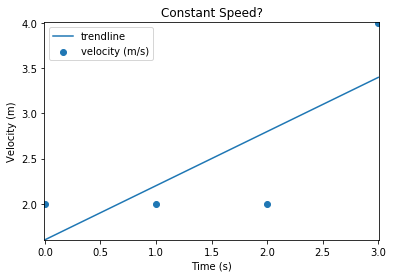

In [8]:
# set new variables to plot
time2 = data2['time (s)']
vel2 = data2['velocity (m/s)']


# plot data just like before
plt.scatter(time2, vel2)
plt.title("Constant Speed?")
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m)")
plt.autoscale(tight=True)

# calculate trendline equation like before
trend2 = np.polyfit(time2, vel2, 1)

# plot trendline like before
plt.plot(time2, np.poly1d(trend2)(time2), label='trendline')
plt.legend(loc='upper left')

In [9]:
# display the trendline's coefficients (slope, y-int)
trend2

array([ 0.6,  1.6])

# Part Three
Now the program has calulcated the velocity between each pair of position values.
- Look at the blocks of code after **Part Two**. For each block, write a complete sentence to summarize what the program does.
- Based on the velocity graph above, how well does the trendline fit the data? What does that mean about the motion?

---
## Saving Your Work
This is running on a Google Compute Engine server on a distant planet and deletes what you've done after 20 minutes of inactivity. To save for later use or analysis you have a few options:
- File > Download as > ipynb (to continue your analysis later)
- File > Download as > pdf (static copy including code and graphs)
- Right-click on a graph and select Save Image As ... (to share a pic)

## Credits
This notebook was designed by Adam LaMee. Find more activities and license info at [CODINGinK12.org](http://www.codingink12.org). And thanks to the great folks at [MyBinder.org](https://beta.mybinder.org/) this notebook is interactive without you needing to download it or install Jupyter on your own device.